In [1]:
#this is a kaggle data science competition which i will be aiming to determine  and identify
#which households have the highest need for social welfare assistance
#credits to kaggle for dataset...link...https://www.kaggle.com/c/costa-rican-household-poverty-prediction

In [2]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize']=(15,10)
%matplotlib inline

In [3]:
#loading the datasets
train=pd.read_csv('C://Users/sojore/Documents/costa-rican-household-poverty-prediction/train.csv')
test=pd.read_csv('C://Users/sojore/Documents/costa-rican-household-poverty-prediction/test.csv')

In [4]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [5]:
#exploring the dataset
train.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [6]:
train.shape

(9557, 143)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [8]:
#handling the missing values
train.isnull().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64

In [9]:
#droping some unnecessary colunms i think wont contribute much into doing correct predictions
df=train.drop(['Id','v18q1','r4h1','r4h2','r4h3','r4m1','r4m2','r4m3','r4t1','r4t2','escolari',
               'rez_esc','pisoother','elimbasu6','male','female','estadocivil1','estadocivil2','parentesco2','parentesco3',
               'parentesco4','parentesco5','parentesco6','parentesco7','parentesco8','parentesco9','parentesco10',
               'parentesco11','parentesco12','edjefe','edjefa',],axis='columns')
df.shape

(9557, 112)

In [10]:
df.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4t3,tamhog,tamviv,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,1,1,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,135000.0,0,4,0,1,1,1,1,1,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,NaN,0,8,0,1,1,0,1,1,1,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,180000.0,0,5,0,1,1,1,4,4,4,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,180000.0,0,5,0,1,1,1,4,4,4,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [11]:
#handling missing values
df.isna().sum().tail(10)

SQBescolari        0
SQBage             0
SQBhogar_total     0
SQBedjefe          0
SQBhogar_nin       0
SQBovercrowding    0
SQBdependency      0
SQBmeaned          5
agesq              0
Target             0
dtype: int64

In [12]:
df['v2a1'].isna().sum()

6860

In [13]:
df['v2a1'].median()

130000.0

In [14]:
df['v2a1']=df['v2a1'].fillna(df['v2a1'].median())
df['v2a1'].isna().sum()

0

In [15]:
df['SQBmeaned'].median()

81.0

In [16]:
df['SQBmeaned']=df['SQBmeaned'].fillna(df['SQBmeaned'].median())
df['SQBmeaned'].isna().any()

False

In [17]:
df.isna().any()

v2a1               False
hacdor             False
rooms              False
hacapo             False
v14a               False
                   ...  
SQBovercrowding    False
SQBdependency      False
SQBmeaned          False
agesq              False
Target             False
Length: 112, dtype: bool

In [18]:
df1=df.copy()
df1.sample(10)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4t3,tamhog,tamviv,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
3303,130000.0,0,9,0,1,1,1,2,2,2,...,196,1936,4,0,0,0.250000,0.00,156.25000,1936,4
7473,130000.0,0,5,0,1,1,0,3,3,3,...,289,1296,9,289,1,1.000000,0.25,289.00000,1296,4
9108,130000.0,0,4,0,1,1,1,3,3,3,...,0,16,9,0,4,1.000000,4.00,64.00000,16,2
7507,130000.0,0,4,0,1,1,0,5,5,5,...,36,1521,25,0,9,2.777778,2.25,132.25000,1521,2
8179,150000.0,0,5,0,1,1,0,3,3,3,...,121,729,9,0,1,1.000000,0.25,182.25000,729,4
1438,130000.0,0,6,0,1,1,0,4,4,4,...,64,196,16,324,4,1.777778,9.00,400.00000,196,4
7497,130000.0,0,5,0,1,1,0,6,6,6,...,64,256,36,9,9,4.000000,1.00,128.44444,256,3
9492,130000.0,0,2,0,1,1,0,3,3,3,...,49,841,9,0,4,9.000000,4.00,49.00000,841,2
6297,130000.0,0,6,0,1,1,0,2,2,2,...,36,3969,4,36,0,0.250000,0.00,72.25000,3969,4
6974,130000.0,0,3,0,1,1,0,2,2,2,...,81,324,4,0,1,1.000000,1.00,169.00000,324,2


In [19]:
#my data contains no more missing values
df1.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('O')], dtype=object)

In [20]:
for i in df1.columns:
    if df[i].dtypes=='O':
        print(i)

idhogar
dependency


In [21]:
df1['dependency'].dtypes

dtype('O')

In [22]:
df1['dependency'].unique()

array(['no', '8', 'yes', '3', '.5', '.25', '2', '.66666669', '.33333334',
       '1.5', '.40000001', '.75', '1.25', '.2', '2.5', '1.2', '4',
       '1.3333334', '2.25', '.22222222', '5', '.83333331', '.80000001',
       '6', '3.5', '1.6666666', '.2857143', '1.75', '.71428573',
       '.16666667', '.60000002'], dtype=object)

In [23]:
#once submitted to kaggle for grading ,if it gives poor perfomance(model),i will get back get rid of this column to see how 
#the perfomance improves

###for the dependency rate,im gonna replace the 'nos' by the lower quantile Q1(or minimum) in that column and yes by 
#the Q3(or maximum) of the same column
#instead of the mean or mode
#first i will need to convert the string objects to int ojects,
#yet again we dont have enough info on the yes and no rate ,so im just gonna estimate the no rate is 0.5 whilist yes rate 3
df1['dependency']=df1['dependency'].replace({'no':'0.2','yes':'3.5'})
df1['dependency'].unique()

array(['0.2', '8', '3.5', '3', '.5', '.25', '2', '.66666669', '.33333334',
       '1.5', '.40000001', '.75', '1.25', '.2', '2.5', '1.2', '4',
       '1.3333334', '2.25', '.22222222', '5', '.83333331', '.80000001',
       '6', '1.6666666', '.2857143', '1.75', '.71428573', '.16666667',
       '.60000002'], dtype=object)

In [24]:
df1['dependency']=df1['dependency'].apply(lambda x: float(x))
df1['dependency'].dtypes

dtype('float64')

In [25]:
df2=df1.drop('idhogar',axis=1)
df2.shape

(9557, 111)

In [26]:
for i in df2.columns:
    if df2[i].dtypes=='O':
        print(i)

In [27]:
df2.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

In [28]:
df2.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4t3,tamhog,tamviv,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,1,1,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,135000.0,0,4,0,1,1,1,1,1,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,130000.0,0,8,0,1,1,0,1,1,1,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,180000.0,0,5,0,1,1,1,4,4,4,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,180000.0,0,5,0,1,1,1,4,4,4,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


Text(0, 0.5, 'Target')

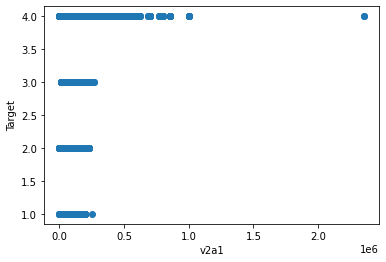

In [29]:
#now i am gonna plot some scatter plots to have a better visualization of the data
plt.scatter(df2['v2a1'],df2['Target'])
plt.xlabel('v2a1')
plt.ylabel('Target')

Text(0, 0.5, 'Target')

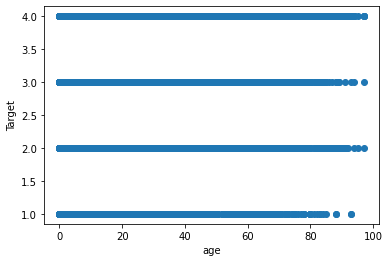

In [30]:
plt.scatter(df2['age'],df2['Target'])
plt.xlabel('age')
plt.ylabel('Target') 

Text(0, 0.5, 'Target')

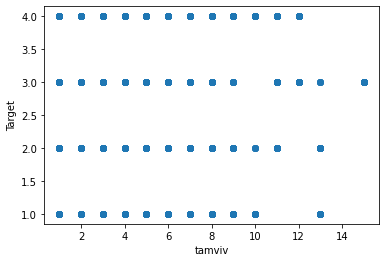

In [31]:
plt.scatter(df2['tamviv'],df2['Target'])
plt.xlabel('tamviv')
plt.ylabel('Target')

In [32]:
#handling outliers
df2.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4t3,tamhog,tamviv,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,9.557000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000
mean,1.399424e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,4.005964,3.999058,4.094590,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.577572,1643.774302,3.302292
std,8.147427e+04,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,1.771202,1.772216,1.876428,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.493725,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,1.300000e+05,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,3.000000,3.000000,3.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,4.000000,4.000000,4.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,1.300000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,5.000000,5.000000,5.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,132.250000,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,13.000000,13.000000,15.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [33]:
lower_limit=df2.v2a1.quantile(0.011)
lower_limit
upper_limit=df2.v2a1.quantile(0.99)
upper_limit

500000.0

In [34]:
df2[df2.v2a1>upper_limit]

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4t3,tamhog,tamviv,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
136,564834.0,0,6,0,1,1,0,4,4,4,...,0,36,16,0,4,1.777778,1.00,182.25,36,4
137,564834.0,0,6,0,1,1,0,4,4,4,...,144,1444,16,0,4,1.777778,1.00,182.25,1444,4
138,564834.0,0,6,0,1,1,0,4,4,4,...,0,25,16,0,4,1.777778,1.00,182.25,25,4
139,564834.0,0,6,0,1,1,0,4,4,4,...,225,1764,16,0,4,1.777778,1.00,182.25,1764,4
382,570540.0,0,8,0,1,1,1,5,5,5,...,225,1936,25,441,9,1.562500,2.25,324.00,1936,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6191,620000.0,0,6,0,1,1,1,3,3,3,...,0,25,9,289,1,1.000000,0.25,289.00,25,4
6192,620000.0,0,6,0,1,1,1,3,3,3,...,289,1600,9,289,1,1.000000,0.25,289.00,1600,4
6193,620000.0,0,6,0,1,1,1,3,3,3,...,289,1225,9,289,1,1.000000,0.25,289.00,1225,4
7012,600000.0,0,6,0,1,1,0,2,2,2,...,36,3721,4,121,0,0.160000,0.00,72.25,3721,4


In [35]:
df3=df2[(df2.v2a1>lower_limit) & (df2.v2a1<upper_limit)]
df3.shape

(9327, 111)

In [36]:
df3.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4t3,tamhog,tamviv,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,1,1,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,135000.0,0,4,0,1,1,1,1,1,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,130000.0,0,8,0,1,1,0,1,1,1,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,180000.0,0,5,0,1,1,1,4,4,4,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,180000.0,0,5,0,1,1,1,4,4,4,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [37]:
df3.dependency.unique()

array([0.2       , 8.        , 3.5       , 3.        , 0.5       ,
       0.25      , 2.        , 0.66666669, 0.33333334, 1.5       ,
       0.40000001, 0.75      , 1.25      , 2.5       , 1.2       ,
       4.        , 1.3333334 , 2.25      , 0.22222222, 5.        ,
       0.83333331, 0.80000001, 6.        , 1.6666666 , 0.2857143 ,
       1.75      , 0.71428573, 0.16666667, 0.60000002])

In [38]:
lower_limit1=df3.dependency.quantile(0.2)
lower_limit1
upper_limit1=df3.dependency.quantile(0.99)
lower_limit1,upper_limit1

(0.25, 8.0)

In [39]:
df3[(df3.dependency<lower_limit1) | (df3.dependency>=upper_limit1)].head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4t3,tamhog,tamviv,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,1,1,1,...,100,1849,1,100,0,1.00,0.0,100.00,1849,4
1,135000.0,0,4,0,1,1,1,1,1,1,...,144,4489,1,144,0,1.00,64.0,144.00,4489,4
2,130000.0,0,8,0,1,1,0,1,1,1,...,121,8464,1,0,0,0.25,64.0,121.00,8464,4
19,215000.0,0,4,0,1,1,0,2,2,2,...,144,484,4,225,0,1.00,0.0,182.25,484,4
20,215000.0,0,4,0,1,1,0,2,2,2,...,225,676,4,225,0,1.00,0.0,182.25,676,4


In [40]:
df4=df3[(df3.dependency>lower_limit1) & (df3.dependency<upper_limit1)]
df4.shape

(6896, 111)

In [41]:
ll3=df4.SQBage.quantile(0.1)
ul3=df4.SQBage.quantile(0.99)
ll3,ul3

(25.0, 7225.0)

In [42]:
df4[(df4.SQBage<ll3) | (df4.SQBage>ul3)].head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4t3,tamhog,tamviv,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
67,200000.0,0,3,0,1,1,0,5,5,5,...,0,1,25,81,4,6.25,0.444444,81.0000,1,4
86,130000.0,0,4,0,1,1,0,2,2,2,...,0,7921,4,0,0,1.00,1.000000,42.2500,7921,4
96,130000.0,0,4,0,1,1,0,5,5,5,...,0,16,25,0,4,6.25,0.444444,36.0000,16,4
116,200000.0,0,5,0,1,1,0,6,6,6,...,0,1,36,196,4,4.00,1.000000,132.2500,1,4
129,130000.0,0,7,0,1,1,1,4,4,4,...,36,9409,16,289,0,1.00,9.000000,162.5625,9409,4


In [43]:
df5=df4[(df4.SQBage>ll3) & (df4.SQBage<ul3)]
df5.shape

(6107, 111)

In [44]:
ll4=df5.SQBmeaned.quantile(0.01)
ul4=df5.SQBmeaned.quantile(0.99)
ll4,ul4

(1.0, 460.9749999999915)

In [45]:
df5[(df5.SQBmeaned<ll4) | (df5.SQBmeaned>ul4)].head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4t3,tamhog,tamviv,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
11,100000.0,0,3,0,1,1,0,2,2,2,...,144,324,4,0,1,1.000000,1.00,529.00,324,4
12,100000.0,0,3,0,1,1,0,2,2,2,...,121,1156,4,0,1,1.000000,1.00,529.00,1156,4
455,180000.0,0,4,0,1,1,1,2,2,2,...,196,676,4,0,1,1.000000,1.00,529.00,676,4
456,180000.0,0,4,0,1,1,1,2,2,2,...,81,361,4,0,1,1.000000,1.00,529.00,361,4
1019,350000.0,0,6,0,1,1,1,5,5,5,...,121,324,25,289,9,2.777778,2.25,462.25,324,4


In [46]:
df6=df5[(df5.SQBmeaned>ll4) & (df5.SQBmeaned<ul4)]
df6.shape

(5969, 111)

In [47]:
ll5=df6.SQBescolari.quantile(0.01)
ul5=df6.SQBescolari.quantile(0.99)
ll5,ul5

(0.0, 289.0)

In [48]:
df6[(df6.SQBescolari<ll5) | (df6.SQBescolari>ul5)].head(5)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4t3,tamhog,tamviv,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
210,450000.0,0,7,0,1,1,1,3,3,3,...,441,2116,9,441,1,0.562500,0.25,361.00,2116,4
481,240000.0,0,5,0,1,1,1,3,3,3,...,361,1156,9,361,1,1.000000,0.25,272.25,1156,4
558,130000.0,0,7,0,1,1,1,2,2,2,...,441,4225,4,441,0,0.444444,1.00,342.25,4225,4
644,130000.0,0,6,0,1,1,1,3,3,3,...,441,2116,9,0,1,1.000000,0.25,306.25,2116,4
797,200000.0,0,4,0,1,1,0,3,3,3,...,324,1369,9,324,1,2.250000,0.25,306.25,1369,4


In [49]:
df7=df6[(df6.SQBescolari>ll5) & (df6.SQBescolari<ul5)]
df7.shape

(5457, 111)

In [50]:
ll6=df7.SQBovercrowding.quantile(0.001)
ul6=df7.SQBovercrowding.quantile(0.99)
ll6,ul6

(0.25, 25.0)

In [51]:
df8=df7[(df7.SQBovercrowding>ll6) & (df7.SQBovercrowding<ul6)]
df8.shape

(5347, 111)

In [52]:
ll7=df8.SQBedjefe.quantile(0.1)
ul7=df8.SQBedjefe.quantile(0.99)
ll7,ul7

(0.0, 289.0)

In [53]:
df8[(df8.SQBedjefe<ll7) | (df8.SQBedjefe>ul7)]
df9=df8[(df8.SQBedjefe>=ll7) & (df8.SQBedjefe<=ul7)]
df9.shape

(5322, 111)

In [54]:
ll8=df9.SQBdependency.quantile(0.01)
ul8=df9.SQBdependency.quantile(0.99)
ll8,ul8

(0.11111112, 16.0)

In [55]:
df10=df9[(df9.SQBdependency>=ll8) & (df9.SQBdependency<=ul8)]
df10.shape

(5298, 111)

In [56]:
ll9=df10.SQBhogar_total.quantile(0.01)
ul9=df10.SQBhogar_total.quantile(0.99)
ll9,ul9

(4.0, 100.0)

In [57]:
df11=df10[(df10.SQBhogar_total>=ll9) & (df10.SQBhogar_total<=ul9)]
df11.shape

(5255, 111)

In [59]:
df11.head(1)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4t3,tamhog,tamviv,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
3,180000.0,0,5,0,1,1,1,4,4,4,...,81,289,16,121,4,1.777778,1.0,121.0,289,4


In [60]:
df12=df11.drop(['SQBescolari','SQBage','SQBhogar_total','SQBedjefe','SQBhogar_nin','SQBovercrowding','SQBdependency',
               'SQBmeaned','agesq'],axis='columns')
df12.shape

(5255, 102)

Text(0, 0.5, 'Count')

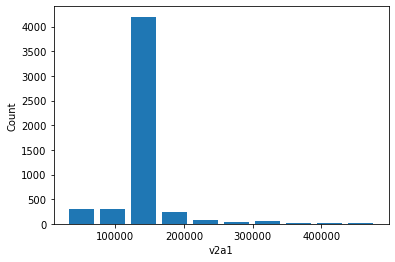

In [61]:
#im gonna plot a histogram to see if my dataset kinda has a normal distribution
plt.hist(df12.v2a1,rwidth=0.8)
plt.xlabel('v2a1')
plt.ylabel('Count')

In [62]:
##boooooom.... my dataset kinda has a normal distribution based on v2a1

In [63]:
#now im gonna do the same operations on the test dataset
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [64]:
#droping some unnecessary colunms i think wont contribute much into doing correct predictions
test1=test.drop(['Id','v18q1','r4h1','r4h2','r4h3','r4m1','r4m2','r4m3','r4t1','r4t2','escolari',
               'rez_esc','pisoother','elimbasu6','male','female','estadocivil1','estadocivil2','parentesco2','parentesco3',
               'parentesco4','parentesco5','parentesco6','parentesco7','parentesco8','parentesco9','parentesco10',
               'parentesco11','parentesco12','edjefe','edjefa','SQBescolari','SQBage','SQBhogar_total','SQBedjefe',
              'SQBhogar_nin','SQBovercrowding','SQBdependency','SQBmeaned','agesq'],axis='columns')
test1.shape

(23856, 102)

In [65]:
test1['v2a1']=test1['v2a1'].fillna(test1['v2a1'].median())
test1['v2a1'].isna().sum()

0

In [66]:
for i in test1.columns:
    if test1[i].dtypes=='O':
        print(i)

idhogar
dependency


In [67]:
test1['dependency']=test1['dependency'].replace({'no':'0.2','yes':'3.5'})
test1['dependency'].unique()

array(['.5', '0.2', '8', '3.5', '.25', '2', '.33333334', '.375',
       '.60000002', '1.5', '.2', '.75', '.66666669', '3', '.14285715',
       '.40000001', '.80000001', '1.6666666', '.2857143', '1.25', '2.5',
       '5', '.85714287', '1.3333334', '.16666667', '4', '.125',
       '.83333331', '2.3333333', '7', '1.2', '2.25', '3.3333333', '6'],
      dtype=object)

In [68]:
test1['dependency']=test1['dependency'].apply(lambda x: float(x))
test1['dependency'].dtypes

dtype('float64')

In [69]:
test2=test1.drop('idhogar',axis=1)
test2.shape

(23856, 101)

In [70]:
test2.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

In [98]:
df13=df12.copy()
df13.shape

(5255, 102)

In [99]:
df13.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4t3,tamhog,tamviv,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
3,180000.0,0,5,0,1,1,1,4,4,4,...,1,0,0,0,0,0,1,0,17,4
4,180000.0,0,5,0,1,1,1,4,4,4,...,1,0,0,0,0,0,1,0,37,4
5,180000.0,0,5,0,1,1,1,4,4,4,...,1,0,0,0,0,0,1,0,38,4
6,180000.0,0,5,0,1,1,1,4,4,4,...,1,0,0,0,0,0,1,0,8,4
8,130000.0,1,2,0,1,1,0,4,4,4,...,1,0,0,0,0,0,1,0,30,4


In [100]:
df13.meaneduc.median()

8.666667

In [101]:
df13.meaneduc=df13.meaneduc.fillna(df13.meaneduc.median())

In [102]:
df13.meaneduc.isna().any()

False

In [76]:
test2.meaneduc.isna().any()

True

In [77]:
test2.meaneduc.median()

8.666667

In [78]:
test2.meaneduc=test2.meaneduc.fillna(test2.meaneduc.median())

In [79]:
test2.meaneduc.isna().any()

False

In [80]:
test2.dependency.isna().any()

False

In [81]:
for i in test2.columns:
    pass

In [82]:
##preparing my data for X_train,and y_train
X_test=test2.copy()
X_test.sample(3)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4t3,tamhog,tamviv,...,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age
19765,140000.0,0,5,0,1,1,0,4,4,4,...,2,0,0,0,0,1,0,1,0,1
922,140000.0,0,6,0,1,1,1,3,3,3,...,2,1,0,0,0,0,0,1,0,58
14569,250000.0,0,5,0,1,1,0,4,4,4,...,4,0,1,0,0,0,0,1,0,18


In [103]:
#now am gonna create my X_train,y_train so as to create my model for prediction
X_train=df13.drop('Target',axis='columns')
X_train.head(2)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4t3,tamhog,tamviv,...,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age
3,180000.0,0,5,0,1,1,1,4,4,4,...,3,1,0,0,0,0,0,1,0,17
4,180000.0,0,5,0,1,1,1,4,4,4,...,3,1,0,0,0,0,0,1,0,37


In [104]:
y_train=df13.Target
y_train.sample(10)

9256    4
7983    2
1609    4
8969    2
1655    4
2775    4
5344    4
2244    4
8704    2
2774    4
Name: Target, dtype: int64

In [105]:
#next is using gridsearchcv to determine my best model to do predictions
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [106]:
#writing a function to give the best model with the best parameters(hyper paramter tuning)
def find_best_model_using_gridsearchcv(X,y):
    models={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        'svm':{
            'model':SVC(),
            'params':{
                'C':[1,2,3],
                'kernel':['linear','rbf']
            }
        },
        'random_forest':{
            'model':RandomForestClassifier(),
            'params':{
                
            }
        },
        'logistic_regression':{
            'model':LogisticRegression(),
            'params':{
                
            }
        },'gausian':{
            'model':GaussianNB(),
            'params':{}
        }
    }
#this is what we call hyper parameter tunning

    my_scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name,config in models.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        my_scores.append({
            'model':model_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(my_scores,columns=['model','best_score','best_params'])


In [107]:
find_best_model_using_gridsearchcv(X_train,y_train)
#you can run the above code if using a GPU for faster proccessing

In [108]:
cross_val_score(SVC(),X_train,y_train)

array([0.58515699, 0.58515699, 0.58420552, 0.58420552, 0.58420552])

In [110]:
cross_val_score(LinearRegression(),X_train,y_train)

array([0.24521354, 0.22440726, 0.2476291 , 0.21205561, 0.29797239])

In [111]:
cross_val_score(LogisticRegression(),X_train,y_train)

array([0.58896289, 0.58515699, 0.58420552, 0.58420552, 0.58420552])

In [112]:
cross_val_score(Lasso(),X_train,y_train)

array([-0.02673691,  0.05372775,  0.05770789,  0.00682189, -0.03376471])

In [113]:
cross_val_score(GaussianNB(),X_train,y_train)

array([0.62226451, 0.57088487, 0.58515699, 0.60038059, 0.52045671])

In [114]:
cross_val_score(DecisionTreeRegressor(),X_train,y_train)

array([-0.7484991 , -0.42808628, -0.31084012, -0.52268817, -0.37054533])

In [115]:
cross_val_score(RandomForestClassifier(),X_train,y_train)

array([0.61655566, 0.59467174, 0.56898192, 0.45195052, 0.52235966])

In [158]:
#from the above ,i see that using cross_val_score ,logistic regression would be a good algorithm to use in 
#creating my model
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [163]:
y_predicted=model.predict(X_test)
y_predicted[:10]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

In [164]:
#readying to create a submission file
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [167]:
test['Target']=y_predicted
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,0,16,9,0,1,2.25,0.25,272.25,16,4
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,256,1681,9,0,1,2.25,0.25,272.25,1681,4
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,289,1681,9,0,1,2.25,0.25,272.25,1681,4
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,256,3481,1,256,0,1.00,0.00,256.00,3481,4
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,121,324,1,0,1,0.25,64.00,NaN,324,4


In [168]:
submission_file=test[['Id','Target']]
submission_file.head()

,Id,Target
0,ID_2f6873615,4
1,ID_1c78846d2,4
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,4


In [173]:
submission_file.to_csv('sample_submission.csv',index=False)